# fruits를 KNN으로 분류하기

In [2]:
import pandas as pd

fruits =pd.read_csv("../data/fruits.csv")
fruits.head()

,length,weight,name
0,25.4,242.0,apple
1,26.3,290.0,apple
2,26.5,340.0,apple
3,29.0,363.0,apple
4,29.0,430.0,apple


---



In [11]:
# 연습 : numpy의 Column stack과 Row stack



import numpy as np
testA = np.array([1, 2, 3, 4])
testB = np.array([10, 20, 30, 40])


# 2개의 array를 묶어서 컬럼기반의 2d array로 합치기

combineA = [[i,j] for i, j in zip(testA, testB)]
print(np.array(combineA))

combineB = np.column_stack([testA, testB])
print(combineB)

print( "*" * 10)

combineC = np.row_stack((testA, testB))
print(combineC)

[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]]
[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]]
**********
[[ 1  2  3  4]
 [10 20 30 40]]


### Feature Set과 Target Set을 Numpy의 Array로 변경

In [12]:
fruits_data = np.column_stack((fruits.length, fruits.weight))
fruits_data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

In [14]:
fruits_target = np.array(fruits['name'])
fruits_target

array(['apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple',
       'berry', 'berry', 'berry', 'berry', 'berry', 'berry', 'berry',
       'berry', 'berry', 'berry', 'berry', 'berry', 'berry', 'berry'],
      dtype=object)

### Train과 Test로 나누기

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_input, test_input, train_target, test_target = train_test_split(
                                                            fruits_data,
                                                            fruits_target,
                                                            stratify=fruits_target,
                                                            random_state=42,
)

### KNN Classification


In [17]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target)

KNeighborsClassifier()

In [27]:
KNeighborsClassifier?


Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape

In [18]:
kn.score(test_input, test_target)

1.0

---
### 수상한 과일?


In [19]:
# length : 25, weight : 150

In [22]:
kn.predict([[25, 150]])

array(['berry'], dtype=object)

In [23]:
import matplotlib.pyplot as plt

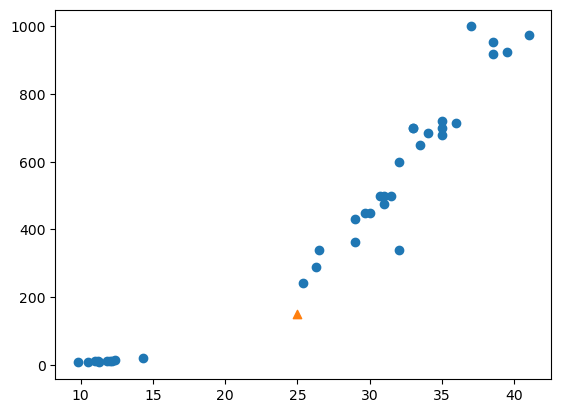

In [29]:
plt.scatter(
    train_input[:,0],
    train_input[:,1]
)

plt.scatter(
    25,
    150,
    marker="^"
)

### 이웃을 출력해보자


In [31]:
distances, indexes = kn.kneighbors([[25, 150]])

print(indexes)

[[11 20 13 22 15]]


In [32]:
train_input[indexes]

array([[[ 25.4, 242. ],
        [ 14.3,  19.7],
        [ 12.4,  13.4],
        [ 12.2,  12.2],
        [ 26.3, 290. ]]])

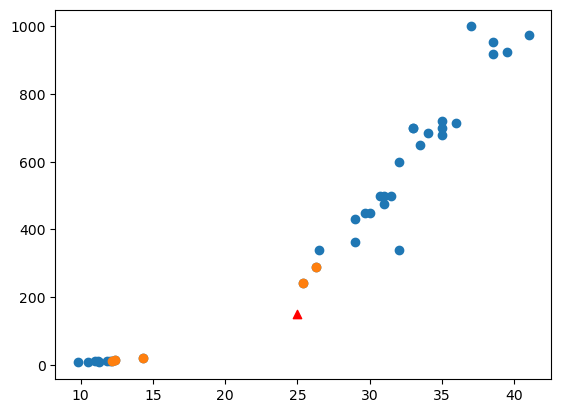

In [36]:
plt.scatter(
    train_input[:,0],
    train_input[:,1]
)

plt.scatter(train_input[indexes, 0], train_input[indexes, 1])

plt.scatter(
    25,
    150,
    marker="^",
    c = 'red'
)


plt.show()

### 기준 맞추기

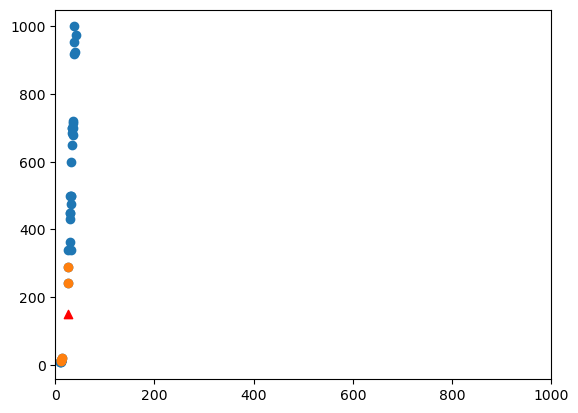

In [39]:
plt.scatter(
    train_input[:,0],
    train_input[:,1]
)

plt.scatter(train_input[indexes, 0], train_input[indexes, 1])

plt.scatter(
    25,
    150,
    marker="^",
    c = 'red'
)

plt.xlim(0, 1000)


plt.show()

> sample이 length에는 거의 영향을 받지 않고 weight에서 영향을 많이 받는다.


In [42]:
#Length와 weight의 평균과 표준편차를 구해서 비교해보자

mean = np.mean(train_input, axis=0)
mean

array([ 26.93333333, 441.98333333])

In [44]:
std = np.std(train_input, axis=0)
std

array([ 10.09141549, 325.61300692])

In [45]:
print(mean, std)

[ 26.93333333 441.98333333] [ 10.09141549 325.61300692]


### train_data를 표준점수(Z점수)로 변경하자
: train_scaled = (train_input - mean) / std

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()

scaler.fit(train_input)
train_scaled = scaler.transform(train_input)
train_scaled[:5]

array([[ 0.79935928,  0.85382543],
       [ 0.20479453, -0.24256812],
       [-1.54917151, -1.33066961],
       [ 0.37325454,  0.17817675],
       [-1.55908092, -1.32729137]])

In [48]:
train_scaled2 = scaler.fit_transform(train_input)
train_scaled2[:5]

array([[ 0.79935928,  0.85382543],
       [ 0.20479453, -0.24256812],
       [-1.54917151, -1.33066961],
       [ 0.37325454,  0.17817675],
       [-1.55908092, -1.32729137]])

### 전처리 모델로 시각화

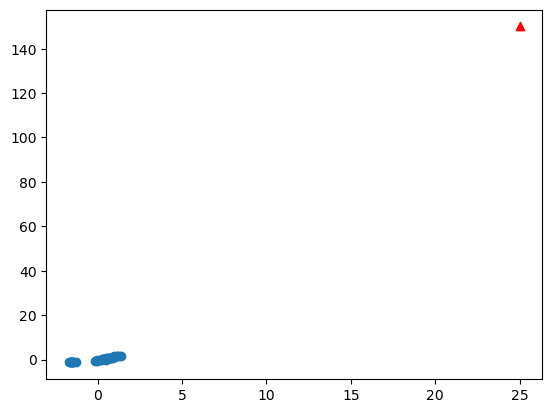

In [49]:
plt.scatter(
    train_scaled[:,0],
    train_scaled[:,1]
)


plt.scatter(
    25,
    150,
    marker="^",
    c = 'red'
)


plt.show()

> 예측할 데이터도 변경이 필요

In [50]:
new = ([25, 150] - mean)/ std

new

array([-0.19158198, -0.89671889])

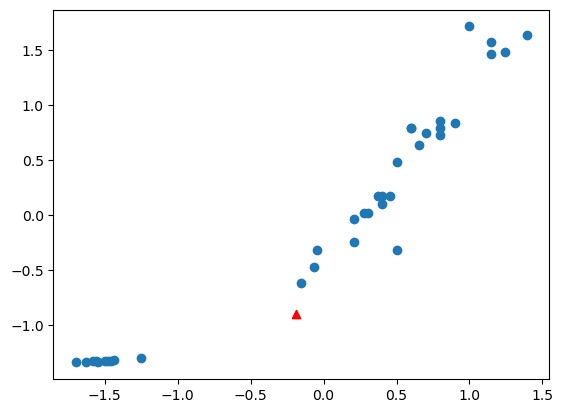

In [51]:
plt.scatter(
    train_scaled[:,0],
    train_scaled[:,1]
)


plt.scatter(
    new[0],
    new[1],
    marker="^",
    c = 'red'
)


plt.show()

## KNN으로 분류

In [52]:
# 학습
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [53]:
# 검증데이터도 표준점수로 변경
test_scaled = (test_input - mean) / std

In [54]:
kn.score(test_scaled, test_target)

1.0

In [56]:
# 수상한 과일을 다시 예측하자
print(kn.predict([new]))

['apple']


In [58]:
_, index =  kn.kneighbors([new])

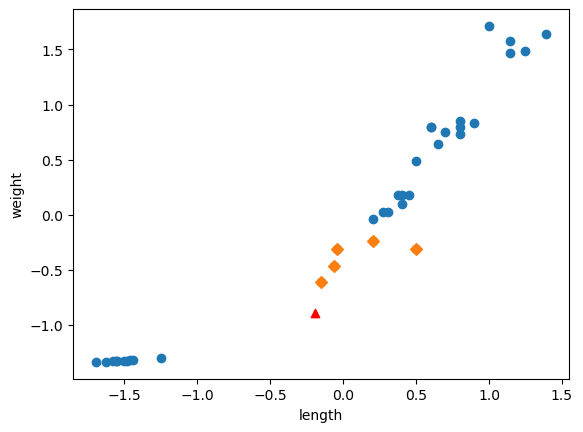

In [64]:


plt.scatter(
    train_scaled[:,0],
    train_scaled[:,1]
)

plt.scatter(
    train_scaled[index,0],
    train_scaled[index,1],
    marker='D'
)


plt.scatter(
    new[0],
    new[1],
    marker="^",
    c = 'red'
)

plt.xlabel('length')
plt.ylabel('weight')

plt.show()